In [35]:
# Let's start with importing the necessary libraries as we go
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import date
import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import acf

import warnings
warnings.filterwarnings("ignore")

### -------------------------------------------------------------------------------------------------------------
## (0) Choose an ETF to work with in the Google spreadsheet.

#### We have chosen the second ticker "(VUG) Vanguard Growth Index Fund" for this project.

### -------------------------------------------------------------------------------------------------------------
## (1) Using autocorrelation and partial autocorrelation functions determine a few alternative ARMA(p,q)
## representations that can potentially represent the time-series behavior of the ETF return.


In [53]:
# Load VUG data
ticker = 'VUG'
data = yf.download(ticker, start='2004-02-01', end='2023-11-01')
returns = data['Adj Close'].pct_change().dropna()

# fit ARMA model to generated data
model = sm.tsa.ARIMA(returns, order=(1,0,1))
results = model.fit()

# Print the model summary
print(results.summary())

[*********************100%***********************]  1 of 1 completed
                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 4971
Model:                 ARIMA(1, 0, 1)   Log Likelihood               14709.354
Date:                Fri, 24 Nov 2023   AIC                         -29410.708
Time:                        08:37:00   BIC                         -29384.662
Sample:                             0   HQIC                        -29401.576
                               - 4971                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      2.713      0.007       0.000       0.001
ar.L1          0.0689      0.064      1.070      0.284      -0

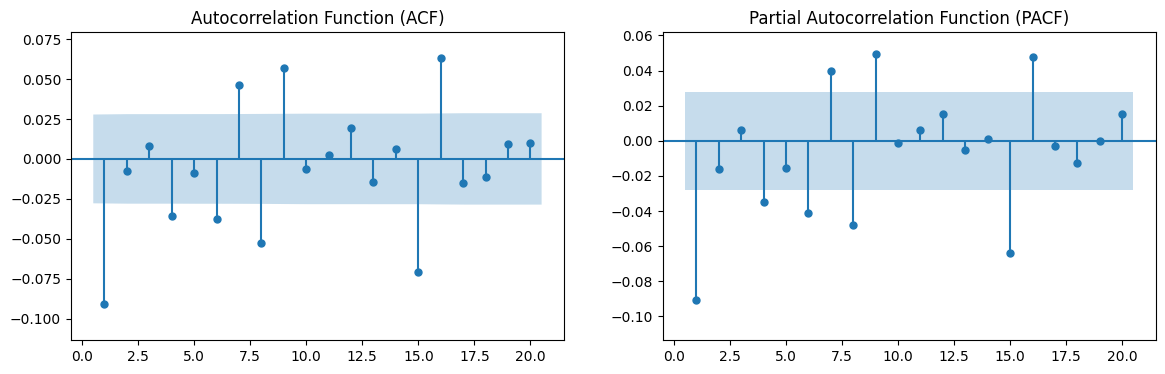

In [54]:
# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(returns, lags=20, alpha= 0.05, auto_ylims=True, zero=False, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

plot_pacf(returns, lags=20, alpha = 0.05, auto_ylims=True, zero=False, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.show()
